In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica

# Regresión en Python

En este cuadermo vamos a ver cómo hacer regresión en Python.

## 1. Regresión lineal

Inialmente, vamos a importar las librerías necesarias y a generar unos datos sintéticos para hacer la regresión.

In [9]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')



In [10]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head()

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


In [11]:
len(equipos)

30

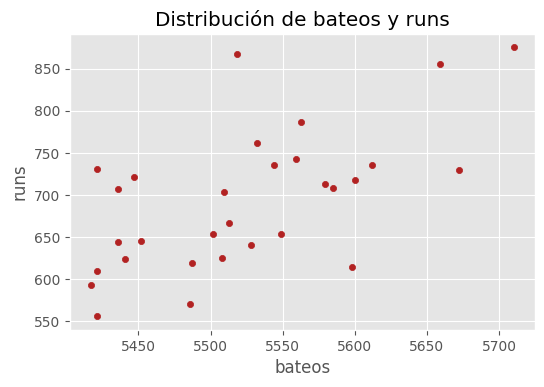

In [12]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [13]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791975


In [14]:
corr_test

PearsonRResult(statistic=np.float64(0.6106270467206688), pvalue=np.float64(0.0003388351359791975))

El gráfico y el test de correlación muestran una relación lineal, de intensidad moderada (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

## Ajuste del modelo


Se ajusta un modelo empleando como variable respuesta runs y como predictor bateos.
$$\text{runs}=f(\text{bateos}) = b_0+b_1(\text{bateos})$$

 Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

## Entrenamiento del modelo


La función  `train_test_split` es una función muy utilizada en la biblioteca de aprendizaje automático `scikit-learn` de Python, diseñada para dividir conjuntos de datos en subconjuntos de entrenamiento y prueba.

El conjunto de datos se va a dividir en dos partes:

1. Conjunto de entrenamiento: Una muestra para crear el modelo.
2. Conjunto de prueba: El conplemento de la muestra. Se usará para testear la efectividad del modelo.



## Parámetros Principales
* **arrays**: Los datasets que quieres dividir (por ejemplo, características y etiquetas).
* **test_size**: Especifica la proporción del dataset que será asignado al conjunto de prueba. Puede ser un float (que representa una fracción del total) o un entero (que indica el número exacto de muestras a usar como conjunto de prueba).
* **train_size**: Similar a test_size, pero para el conjunto de entrenamiento. Si no se especifica, el tamaño se ajustará automáticamente para complementar el test_size.
* **random_state**: Un valor que actúa como semilla para el generador de números aleatorios utilizado durante la división. Esto asegura que los resultados sean reproducibles.
* **shuffle**: Un booleano que indica si los datos deben barajarse antes de dividirse. El valor por defecto es True, lo que garantiza que la división mezcle aleatoriamente los datos antes de separarlos.
* **stratify**: Este parámetro se utiliza para asegurar que las proporciones de las categorías en las muestras resultantes se mantengan iguales (o casi iguales) a las del conjunto original. Es especialmente útil en casos de clasificación con clases desbalanceadas.

In [15]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), # Convierte los datos en un array
                                        y.values.reshape(-1,1), # Convierte los datos en un array
                                        train_size   = 0.5, #Toma la mitad de los datos
                                        random_state = 1234, # Semilla de generación pseudo aleatoria
                                        shuffle      = True # Tomar muestras aleatorias
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [21]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-1206.32758024]
Coeficiente: [('bateos', np.float64(0.3412083055499558))]
Coeficiente de determinación R^2: 0.25892577961437224


c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Recuerden que el coeficiente de determinación

$$R^2 = \cfrac{SCR}{STC}$$


In [22]:
modelo.score(X, y)

c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.25892577961437224

## ¿Cómo medir la efectividad del modelo creado?

En la clase anterior definimos:

* **Error cuadrado medio**

El error cuadrático medio (ECM-mse) es una medida de la calidad de un estimador. Se calcula como la media de los errores al cuadrado, es decir, la diferencia entre los valores observados y los valores predichos por el modelo.

El error cuadrático medio (ECM-mse) se calcula como:

$$s^2 =\cfrac{SCE}{n-2} = \cfrac{\sum (y_i-\hat{y_i})^2}{n-2}$$

* Error estandar de la estimación (rmse)

$$s= \sqrt{ECM}$$

Este valor, es la desviación estándar de los errores. Es una medida de la precisión de las predicciones del modelo. Cuanto menor sea el error estándar de la estimación, mejor será la precisión del modelo.

In [23]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[652.23406009]
 [699.32080626]
 [681.23676607]
 [741.97184445]
 [641.99781093]]

El error (rmse) de test es: 70.46062716834251


c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error (rmse) de test es: 70.46, esto se interpreta como: Las predicciones del modelo final se alejan en promedio 70.46 unidades del valor real.

**Observe que**

Aunque se muestren las 5, 10 o todas las predicciones, el test se realiza con todo el conjunto de entrenamiento.

In [16]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:15,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[652.23406009]
 [699.32080626]
 [681.23676607]
 [741.97184445]
 [641.99781093]
 [685.33126573]
 [729.00592884]
 [653.94010162]
 [674.75380826]
 [708.53343051]
 [643.36264415]
 [648.48076873]
 [724.57022087]
 [691.81422354]
 [665.54118401]]

El error (rmse) de test es: 70.46062716834251


c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Entrenemos el modelo con el 20% de los datos:

In [17]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.2,
                                        random_state = 1234, # Semilla de generación pseudo aleatoria
                                        shuffle      = True # Tomar muestras aleatorias
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [18]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-3040.70177384]
Coeficiente: [('bateos', np.float64(0.6766629711751663))]
Coeficiente de determinación R^2: 0.3692688290123659


c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [19]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[645.08143016]
 [738.46092018]
 [702.59778271]]

El error (rmse) de test es: 58.82503857469956


c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error (rmse) de test es: 58.82

esto se interpreta como: Las predicciones del modelo final se alejan en promedio 58.82 unidades del valor real.

In [20]:
y_test[0:3,]

array([[721],
       [708],
       [762]])

## Condiciones teóricas del modelo

Recordemos que inicialmente suponemos un modelo poblacional en la forma:

$$y = \beta_0 +\beta_1 x + 𝜖$$

Sin embargo, gracias al trabajo estadístico se obtiene una estimación muestral de estos coeficientes

$$y = b_0 +b_1 x$$

y que se desarrolla una prueba de hipótesis para estudiar la significancia del modelo encontrado.

Las pruebas de significancia en el análisis de regresión están basadas en las suposiciones siguientes acerca del término del error:
1. El término del error, $\epsilon$, es un valor numérico desconocido pero que se espera sea **cero**. Esto implica que el valor esperado para la variable $y$ este dado por
  
  $$E\left(y\right)= \beta_0\mathrm{\ +\ }\beta_1x.$$

2. La varianza de $\epsilon$, que se denota $\sigma^2$, es la misma para todos los valores de $x$. Esto implica que la varianza de $y$ respecto a la recta de regresión es igual a $\sigma^2$ y es la misma para todos los valores de $x$.

3. Los valores de $\epsilon$ son independientes. El valor de $\epsilon$ correspondiente a un determinado valor de $x$ no está relacionado con el valor de $\epsilon$ correspondiente a ningún otro valor de $x$; por lo tanto, el valor de y correspondiente a un determinado valor de $x$ no está relacionado con el valor de $y$ de ningún otro valor de $x$.

4. El término del error $\epsilon$  es un valor distribuido normalmente. Como $y$ es función lineal de $\epsilon$, también $y$ es un valor distribuido normalmente.

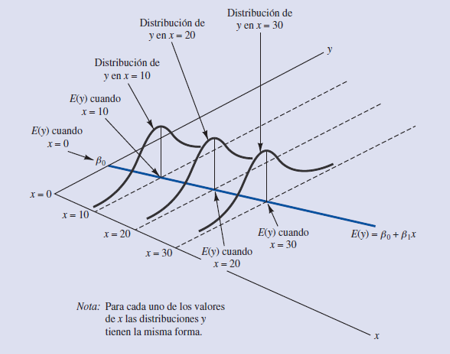

## Regresión lineal con Statsmodels

La implementación de regresión lineal de `Statsmodels`, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [21]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [22]:
#Creación del modelo utilizando el modo fórmula
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sat, 05 Oct 2024   Prob (F-statistic):            0.00906
Time:                        10:56:15   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2367.7028   1066.357     -2.220      0.0

In [23]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sat, 05 Oct 2024   Prob (F-statistic):            0.00906
Time:                        10:56:19   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

## Intervalos de confianza de los coeficientes

In [24]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

## Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

.predict(): devuelve únicamente el valor de las predicciones.

.get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [25]:
X_train

array([[1.000e+00, 5.672e+03],
       [1.000e+00, 5.452e+03],
       [1.000e+00, 5.513e+03],
       [1.000e+00, 5.612e+03],
       [1.000e+00, 5.421e+03],
       [1.000e+00, 5.436e+03],
       [1.000e+00, 5.659e+03],
       [1.000e+00, 5.563e+03],
       [1.000e+00, 5.486e+03],
       [1.000e+00, 5.441e+03],
       [1.000e+00, 5.421e+03],
       [1.000e+00, 5.600e+03],
       [1.000e+00, 5.502e+03],
       [1.000e+00, 5.528e+03],
       [1.000e+00, 5.436e+03],
       [1.000e+00, 5.598e+03],
       [1.000e+00, 5.509e+03],
       [1.000e+00, 5.421e+03],
       [1.000e+00, 5.487e+03],
       [1.000e+00, 5.549e+03],
       [1.000e+00, 5.508e+03],
       [1.000e+00, 5.518e+03],
       [1.000e+00, 5.559e+03],
       [1.000e+00, 5.579e+03]])

In [26]:
X_train[:,1]

array([5672., 5452., 5513., 5612., 5421., 5436., 5659., 5563., 5486.,
       5441., 5421., 5600., 5502., 5528., 5436., 5598., 5509., 5421.,
       5487., 5549., 5508., 5518., 5559., 5579.])

In [30]:
modelo.predict(exog = X_train)

array([768.18347545, 646.5517777 , 680.27693026, 735.01119425,
       629.41276574, 637.70583604, 760.99614786, 707.92049793,
       665.34940371, 640.47019281, 629.41276574, 728.37673801,
       674.19534537, 688.57000056, 637.70583604, 727.2709953 ,
       678.06544484, 629.41276574, 665.90227507, 700.18029898,
       677.51257349, 683.04128702, 705.70901252, 716.76643958])

In [27]:
Predicciones = pd.DataFrame({
    'X': X_train[:,1],
    'ye': modelo.predict(exog = X_train)
})
Predicciones

,X,ye
0,5672.0,768.183475
1,5452.0,646.551778
2,5513.0,680.276930
3,5612.0,735.011194
4,5421.0,629.412766
5,5436.0,637.705836
6,5659.0,760.996148
7,5563.0,707.920498
8,5486.0,665.349404
9,5441.0,640.470193


In [28]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
prediccionesmejorado = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediccionesmejorado.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


In [29]:
prediccionesmejorado =modeloger_prediction(exog - X_train).summary_Frame(alpha)

NameError: name 'modeloger_prediction' is not defined

El resultado es un DataFrame que contiene varias columnas, entre ellas:

* **mean:** La predicción central o el valor esperado de la predicción para cada observación.
* **mean_se:** El error estándar de las predicciones.
* **mean_ci_lower, mean_ci_upper:** Los límites inferior y superior del intervalo de confianza para la media de las predicciones.
* **obs_ci_lower, obs_ci_upper:** Los límites inferior y superior del intervalo de confianza para observaciones individuales, que es más amplio porque tiene en cuenta el error inherente en cada predicción individual además del error del modelo.

## Representación gráfica del modelo


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

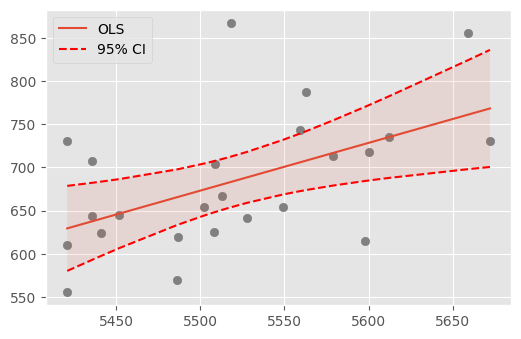

In [30]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [31]:
# Error de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608336157


c:\Users\mpablos\AppData\Local\miniconda3\envs\primer_ambiente\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


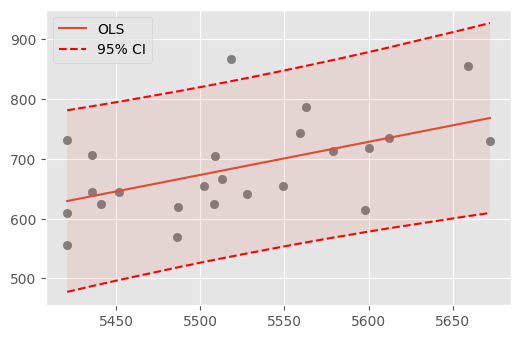

In [32]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["obs_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["obs_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["obs_ci_lower"], predicciones["obs_ci_upper"], alpha=0.1)
ax.legend();

## Prueba F

Nuevamente es una prueba de signigicancia para determinar:

$$H_0: \beta_1 = 0$$
$$H_1: \beta_1 \neq 0$$

El estadístico de prueba en este caso está basado en los errores:

$$F=\cfrac{CMR}{ECM}$$

En general

$$CMR = \cfrac{SCR}{\text{# variables independientes}}$$

Pero como es este caso solo hay una variable independiente

$$CMR = \cfrac{SCR}{\text{1}}= SCR$$

y por lo tanto,

$$F=\cfrac{SCR}{ECM}$$

"F mide, lo que el modelo se pudo haber equivocado sobre lo que realmente se equivicó"

En nuestro caso particular:

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00906
Time:                        20:20:31   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

## Interpretación

* El valor de R-squared indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs).

* El p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias para rechazar la hipótesis nula y aceptar la relación entre los bateos y los runs.

* Ahora bien, con esta prueba se puede  de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

$$\text{runs} = -2367.7028 + 0.6305* \text{bateos}$$

Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.



In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
ruta_archivo ="/content/drive/MyDrive/Fundamentos de estadística para la analítica de datos/Bases de datos/student-mat.csv"

In [242]:
datos = pd.read_csv(ruta_archivo, delimiter=';', na_values="-")
datos

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [243]:
hay_na = datos.isna().any().any()
print("¿Hay valores NA en el DataFrame?:", hay_na)

¿Hay valores NA en el DataFrame?: False


## Datos
Los datos están [acá](https://archive.ics.uci.edu/dataset/320/student+performance)



### Variables para trabajar

* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
*  failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)

In [33]:
columnas_seleccionadas = ['studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

In [34]:
Data =datos[columnas_seleccionadas]
Data

KeyError: "None of [Index(['studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',\n       'health', 'absences'],\n      dtype='object')] are in the [columns]"

In [246]:
Data.describe()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [247]:
import plotly.express as px
fig=px.histogram(x=Data.studytime)
fig.show()

In [248]:
import plotly.express as px
fig=px.histogram(x=Data.failures)
fig.show()

In [249]:
Data.corr()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
studytime,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908
Walc,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291
health,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937
absences,-0.062700,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000


Podemos observar una relación positiva moderada de entre las variables: "Dalc" y "Walc".

* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

In [250]:
X=Data[["Dalc"]] ###  La matriz de la variable predictora
Y=Data["Walc"] ### Selecciono la variable de respuesta
X.shape

(395, 1)

In [252]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=0.8, random_state=20) ## Muestreo aleatorio simple


In [253]:
X_train.shape

(316, 1)

In [254]:
X_test.shape

(79, 1)

In [255]:
RegresionLineal=linear_model.LinearRegression().fit(X_train, Y_train) ## Entrenar la regresión

In [256]:
### Los parametros estimados
print("Intercepto", RegresionLineal.intercept_)
print("betas", pd.DataFrame(RegresionLineal.coef_, index=X_train.columns))

Intercepto 0.8967866850355577
betas              0
Dalc  0.958844


In [257]:
X_test

,Dalc
10,1
261,1
353,3
276,1
17,1
...,...
348,1
370,1
373,1
369,4


In [258]:
## Para obtener un valor pronosticado,Simplemente le ingreso los valores de X
RegresionLineal.predict(X_test)

array([1.85563044, 1.85563044, 3.77331794, 1.85563044, 1.85563044,
       1.85563044, 1.85563044, 1.85563044, 1.85563044, 2.81447419,
       1.85563044, 1.85563044, 1.85563044, 1.85563044, 1.85563044,
       1.85563044, 1.85563044, 1.85563044, 1.85563044, 1.85563044,
       2.81447419, 1.85563044, 1.85563044, 2.81447419, 1.85563044,
       4.7321617 , 1.85563044, 1.85563044, 2.81447419, 1.85563044,
       1.85563044, 1.85563044, 2.81447419, 1.85563044, 1.85563044,
       1.85563044, 1.85563044, 2.81447419, 1.85563044, 1.85563044,
       1.85563044, 1.85563044, 2.81447419, 1.85563044, 1.85563044,
       1.85563044, 5.69100545, 3.77331794, 1.85563044, 1.85563044,
       1.85563044, 2.81447419, 1.85563044, 1.85563044, 2.81447419,
       2.81447419, 2.81447419, 1.85563044, 2.81447419, 2.81447419,
       1.85563044, 1.85563044, 3.77331794, 1.85563044, 1.85563044,
       1.85563044, 1.85563044, 1.85563044, 2.81447419, 1.85563044,
       3.77331794, 1.85563044, 1.85563044, 4.7321617 , 1.85563

In [259]:
Y_pron = pd.DataFrame(RegresionLineal.predict(X_test), index=Y_test.index, columns=["Pronostico"])
Y_pron["Reales"] = Y_test
Y_pron["Media"] = np.mean(Y_test)
Y_pron

,Pronostico,Reales,Media
10,1.855630,2,2.151899
261,1.855630,1,2.151899
353,3.773318,3,2.151899
276,1.855630,1,2.151899
17,1.855630,1,2.151899
...,...,...,...
348,1.855630,3,2.151899
370,1.855630,1,2.151899
373,1.855630,3,2.151899
369,4.732162,2,2.151899


In [260]:
### MSE - Mean Square Error

sum((Y_pron["Reales"]-Y_pron["Pronostico"])**2)/Y_pron.shape[0]

0.8974542158438891

In [261]:
np.sqrt(sum((Y_pron["Reales"]-Y_pron["Pronostico"])**2)/Y_pron.shape[0])

0.9473406018132492

## Métricas

#### Coeficiente de determinación

In [262]:
from sklearn.metrics import r2_score
Y_pred_train=RegresionLineal.predict(X_train) ### Entrenamiento
Y_pred_test=RegresionLineal.predict(X_test) ## Prueba
print("R2 train",np.round(r2_score(Y_train, Y_pred_train),2)*100, "%")
print("R2 prueba",np.round(r2_score(Y_test, Y_pred_test),2)*100, "%")

R2 train 43.0 %
R2 prueba 34.0 %


**Interpretación de Tus Resultados**
* $R^2$ de Entrenamiento (43.0%):
  Este valor indica que el 43.0% de la variabilidad en tu variable dependiente (o de respuesta) puede ser explicada por las variables independientes en el modelo dentro del conjunto de entrenamiento. Esto sugiere una eficacia moderada del modelo en el conjunto de entrenamiento, pero también indica que más de la mitad de la variabilidad no está siendo capturada por el modelo.

* $R^2$ de Prueba de 34.0% en el conjunto de prueba indica que el modelo, cuando se aplica a nuevos datos (los datos de prueba), tiene un desempeño inferior en comparación con los datos de entrenamiento. Esto puede ser un indicio de que el modelo está sobreajustado a los datos de entrenamiento o que simplemente no generaliza bien a nuevos datos.

**Recomendaciones:**

* Sobreajuste (Overfitting): La diferencia entre los valores de $R^2$
  para los conjuntos de entrenamiento y prueba sugiere que podría haber sobreajuste. El sobreajuste ocurre cuando un modelo está demasiado ajustado a los datos de entrenamiento, capturando detalles y ruidos que no se generalizan a otros conjuntos de datos. Esto resulta en un desempeño inferior cuando el modelo se enfrenta a nuevos datos (prueba).

* Revisar las Variables: Considera examinar las variables utilizadas en el modelo. ¿Incluyen información redundante o irrelevante?
* Regularización: Podrías intentar técnicas de regularización como Lasso o Ridge, que pueden ayudar a reducir el sobreajuste ajustando la complejidad del modelo.
* Incluir más datos: A veces, simplemente tener más datos o más variables predictoras relevantes puede mejorar el modelo.

#### Error cuadrático medio

El Mean Squared Error (MSE) o Error Cuadrático Medio es una métrica comúnmente utilizada para medir el rendimiento de modelos de regresión. Representa el promedio de los cuadrados de las diferencias entre los valores observados (reales) y los valores predichos por el modelo. Vamos a interpretar los valores que has proporcionado para el MSE en los conjuntos de entrenamiento y prueba:



In [263]:
from sklearn.metrics import mean_squared_error
Y_pred_train=RegresionLineal.predict(X_train) ### Entrenamiento
Y_pred_test=RegresionLineal.predict(X_test) ## Prueba
print("MSE train",np.round(mean_squared_error(Y_train, Y_pred_train),2))
print("MSE prueba",np.round(mean_squared_error(Y_test, Y_pred_test),2))

MSE train 0.98
MSE prueba 0.9


Este valor indica que en promedio, el cuadrado de la diferencia entre los valores predichos por el modelo y los valores reales en el conjunto de entrenamiento es de 0.98. Cuanto más bajo sea el MSE, mejor, porque indica que las predicciones del modelo están más cerca de los valores reales. Un MSE de 0.98 sugiere que el modelo tiene un rendimiento razonablemente bueno en el conjunto de entrenamiento, dependiendo del contexto y la escala de tu variable objetivo.

Revisemos más a fondo nuestro modelo:

In [264]:
# División de los datos en train y test
# ==============================================================================
X = Data[["Dalc"]]
y = Data["Walc"]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), # Convierte los datos en un array
                                        y.values.reshape(-1,1), # Convierte los datos en un array
                                        train_size   = 0.5,
                                        random_state = 110, # Semilla de generación pseudo aleatoria
                                        shuffle      = True # Tomar muestras aleatorias
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [266]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [0.96995654]
Coeficiente: [('Dalc', 0.8935567172639663)]
Coeficiente de determinación R^2: 0.4184381417923354


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [267]:
# División de los datos en train y test
# ==============================================================================
X = Data[["Dalc"]]
Y = Data["Walc"]

X_train, X_test, Y_train, Y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.5,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [268]:
#Creación del modelo utilizando el modo fórmula
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, Y_train)), columns=['Dalc', 'Walc'])
modelo = smf.ols(formula = 'Walc ~Dalc', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Walc   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     125.3
Date:                Fri, 17 May 2024   Prob (F-statistic):           8.76e-23
Time:                        01:28:48   Log-Likelihood:                -269.18
No. Observations:                 197   AIC:                             542.4
Df Residuals:                     195   BIC:                             548.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9172      0.137      6.677      0.0

In [269]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.760
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.186
Time:                        01:30:06   Log-Likelihood:                -325.48
No. Observations:                 197   AIC:                             655.0
Df Residuals:                     195   BIC:                             661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0836      0.183     11.397      0.0

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[ 1.72304952,  2.44419146],
       [-0.07116133,  0.36360332]])

In [270]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
prediccionesmejorado = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediccionesmejorado.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.229841,0.102692,2.027312,2.432371,-0.281340,4.741023
1,2.229841,0.102692,2.027312,2.432371,-0.281340,4.741023
2,2.229841,0.102692,2.027312,2.432371,-0.281340,4.741023
3,2.376062,0.109381,2.160342,2.591783,-0.136218,4.888343


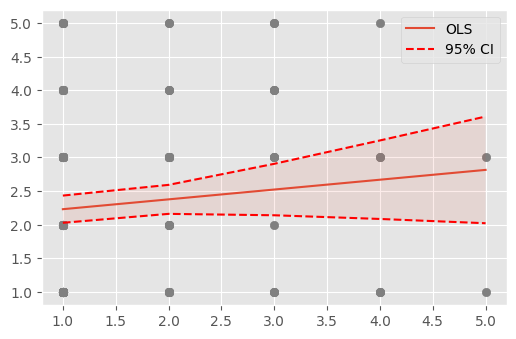

In [271]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [272]:
# Error de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.3072106467458564


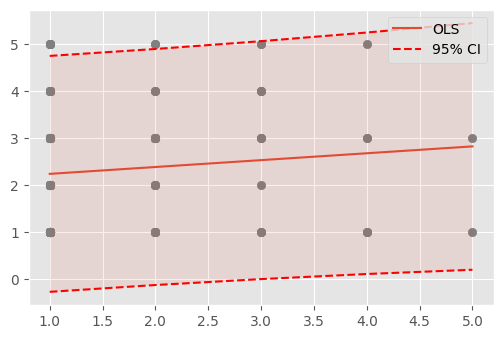

In [273]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["obs_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["obs_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["obs_ci_lower"], predicciones["obs_ci_upper"], alpha=0.1)
ax.legend();

**Otras variables**

In [274]:
Data.corr()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
studytime,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908
Walc,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291
health,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937
absences,-0.062700,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000


### goout~Walk

In [275]:
# División de los datos en train y test
# ==============================================================================
X = Data[["goout"]]
y = Data["Walc"]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), # Convierte los datos en un array
                                        y.values.reshape(-1,1), # Convierte los datos en un array
                                        train_size   = 0.4,
                                        random_state = 110, # Semilla de generación pseudo aleatoria
                                        shuffle      = True # Tomar muestras aleatorias
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [276]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [0.66556812]
Coeficiente: [('goout', 0.5251328642261214)]
Coeficiente de determinación R^2: 0.17556918221739104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [277]:
# División de los datos en train y test
# ==============================================================================
X = Data[["goout"]]
Y = Data["Walc"]

X_train, X_test, Y_train, Y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.5,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [278]:
#Creación del modelo utilizando el modo fórmula
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, Y_train)), columns=['goout', 'Walc'])
modelo = smf.ols(formula = 'goout ~Walc', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  goout   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     37.74
Date:                Fri, 17 May 2024   Prob (F-statistic):           4.46e-09
Time:                        01:34:53   Log-Likelihood:                -281.12
No. Observations:                 197   AIC:                             566.2
Df Residuals:                     195   BIC:                             572.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1933      0.152     14.426      0.0

In [280]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     37.74
Date:                Fri, 17 May 2024   Prob (F-statistic):           4.46e-09
Time:                        01:35:32   Log-Likelihood:                -300.64
No. Observations:                 197   AIC:                             605.3
Df Residuals:                     195   BIC:                             611.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9132      0.232      3.931      0.0

In [281]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[0.45504336, 1.3714426 ],
       [0.3018598 , 0.58733594]])

In [282]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
prediccionesmejorado = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediccionesmejorado.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.802439,0.108409,1.588634,2.016244,-0.414362,4.019239
1,1.802439,0.108409,1.588634,2.016244,-0.414362,4.019239
2,1.802439,0.108409,1.588634,2.016244,-0.414362,4.019239
3,2.691634,0.106927,2.480752,2.902517,0.475114,4.908155


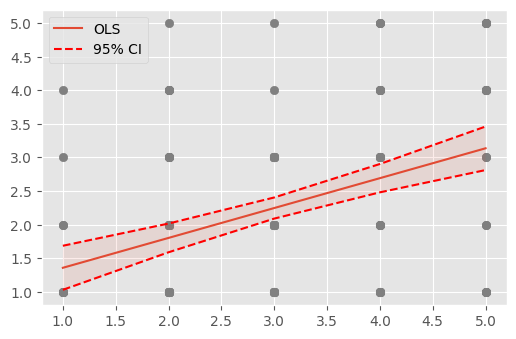

In [283]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = Y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [284]:
# Error de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.2202161893904782


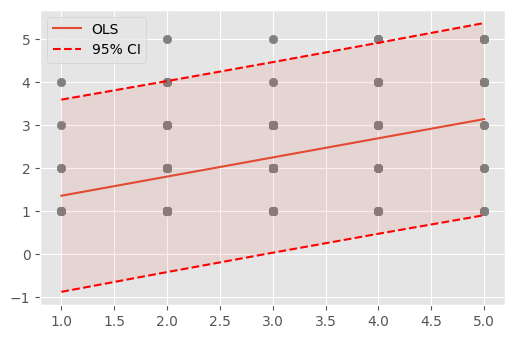

In [285]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = Y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["obs_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["obs_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["obs_ci_lower"], predicciones["obs_ci_upper"], alpha=0.1)
ax.legend();